In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib as mpl

plt.rc('font', family='serif', size = 16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams["figure.figsize"] = (10,8)

In [2]:
data = pd.read_csv('data/ex6_data.txt', sep='\t', header=None, names = ['x'])

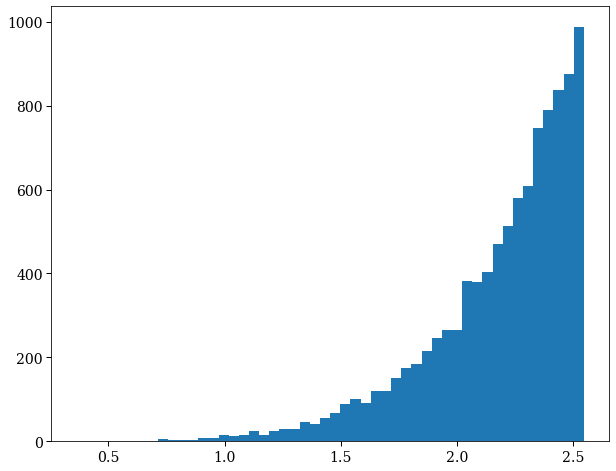

In [3]:
plt.hist(data['x'].values, bins = 50)
plt.show()

# Likelihood analysis only works with negative exponents - why is that?

Hint: Try normalising $f(x) = A x^\gamma$ and see what happens if $\gamma \geq -1$.


## Let's try again with negative exponent data

In [4]:
# Create random data with negative exponents
def rndm(g, size=1):
    """Power-law gen for pdf(x)\propto x^{g} for 1<=x<inf"""
    r = np.random.rand(size)
    return r**(1./(g+1))

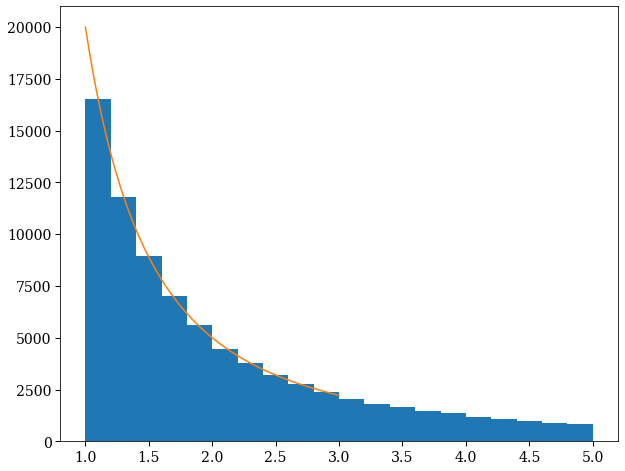

In [5]:
# Set n of data points
ntries=100000
# Set power
gamma=-2
# Get dataset
x = rndm(g=gamma, size=ntries)

# Plot to check
x1 = np.linspace(1, 3, 10000)
nbins=20
range_=[1,5]
plt.hist(x, bins = nbins, range=range_)
binsize = nbins / (range_[1]-range_[0])
#control curve with normalisation factor
plt.plot(x1, 1/binsize*ntries*(-gamma-1)*x1**(gamma))

In [6]:
# Instead of maximising the log likelihood, minimise the negative log likelihood
def log_likelihood(params, x):
    nu, index = params
    f_x = np.abs(index+1)*(x)**(index)
    #model = make_pdf(model)
    #nu = nu*index
    logL = -nu + np.sum(np.log(nu*f_x))
    return -logL

# You can play around with these methods/arguments
res = minimize(log_likelihood, args=x, x0 = [100, -3], method = 'Nelder-Mead')
res

 final_simplex: (array([[ 1.00000001e+05, -1.99761777e+00],
       [ 1.00000001e+05, -1.99761778e+00],
       [ 1.00000001e+05, -1.99761777e+00]]), array([-850815.24429875, -850815.24429875, -850815.24429875]))
           fun: -850815.2442987501
       message: 'Optimization terminated successfully.'
          nfev: 187
           nit: 94
        status: 0
       success: True
             x: array([ 1.00000001e+05, -1.99761777e+00])

You can inspect this for yourself by plotting the log likelihood.

Text(0, 0.5, 'Log-likelihood')

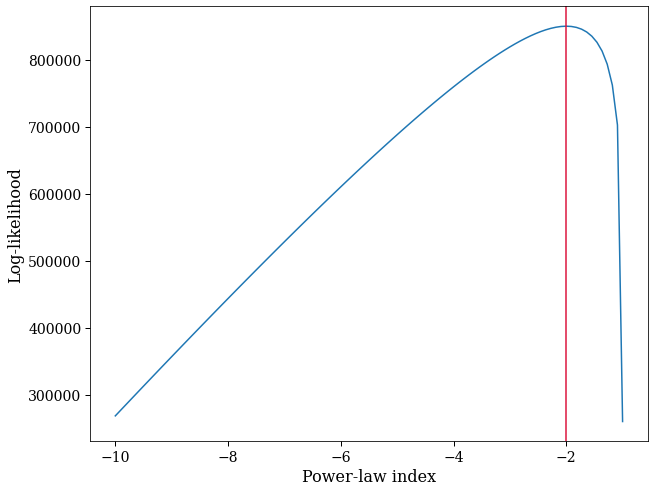

In [7]:
idx = np.linspace(-10, -1.001, 100)
ll = []
for i in range(len(idx)):
    ll.append(-log_likelihood([res.x[0], idx[i]], x))
    
plt.plot(idx, ll)
plt.axvline(x = res.x[1], c = 'crimson')


plt.xlabel('Power-law index')
plt.ylabel('Log-likelihood')